# Preprocessing

The original unfiltered survey data of the PrApp study is not public, which is why this notebook can't be run, but shows the participant selection and grouping of the variables 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tableone import TableOne
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Data from PrApp study (3. and 4. survey wave):**
3,519 participants 

In [ ]:
#   read STATA file with PrApp Data
# all: 3,519 participants 
PrApp_data = pd.read_stata('../data/survey_data/PrApp_Welle3u4.dta')

## Baseline summary
for all 3,519 study participants 

In [56]:
#     ------ BASELINE SUMMARY ---------------------------------------------------------------- 
#  summary of all study participants 
#  age, federal state, filter criteria for PrEP indication,
#  gender, PrEP uptake (includes former PrEP users)

summary_data = PrApp_data[['alter', 'gendersex', 'BL', 'status', 
                           'ALL_TESTSYPH_FREQ', 'ALL_TESTGO_FREQ', 'ALL_TESTCHLA_FREQ', 'ALL_TESTHCV_FREQ', 
                           'ALL_SEXPARTNER', 'ALL_KONDOM', 'ALL_DRUGS']].copy()

# filter criteria (for PrEP indication) --> summarize STI diagnosis in yes / no 
summary_data['ALL_TESTSYPH_FREQ'] = pd.to_numeric(summary_data['ALL_TESTSYPH_FREQ'], errors = 'coerce')
summary_data['POS_SYPH'] = np.where(
    pd.isna(summary_data['ALL_TESTSYPH_FREQ']),  
    None,                                       
    np.where(summary_data['ALL_TESTSYPH_FREQ'] > 0.0, 'Yes', 'No'))

summary_data['ALL_TESTGO_FREQ'] = pd.to_numeric(summary_data['ALL_TESTGO_FREQ'], errors = 'coerce')
summary_data['POS_GO'] = np.where(
    pd.isna(summary_data['ALL_TESTGO_FREQ']),  
    None,                                       
    np.where(summary_data['ALL_TESTGO_FREQ'] > 0.0, 'Yes', 'No'))

summary_data['ALL_TESTCHLA_FREQ'] = pd.to_numeric(summary_data['ALL_TESTCHLA_FREQ'], errors = 'coerce')
summary_data['POS_CHLA'] = np.where(
    pd.isna(summary_data['ALL_TESTCHLA_FREQ']),  
    None,                                       
    np.where(summary_data['ALL_TESTCHLA_FREQ'] > 0.0, 'Yes', 'No'))

summary_data['ALL_TESTHCV_FREQ'] = pd.to_numeric(summary_data['ALL_TESTHCV_FREQ'], errors = 'coerce')
summary_data['POS_HCV'] = np.where(
    pd.isna(summary_data['ALL_TESTHCV_FREQ']),  
    None,                                      
    np.where(summary_data['ALL_TESTHCV_FREQ'] > 0.0, 'Yes', 'No'))

# summarize all STIs in STIs in general
summary_data['POS_STI'] = np.where(
    (summary_data['POS_SYPH'] == 'Yes') | 
    (summary_data['POS_GO'] == 'Yes') | 
    (summary_data['POS_CHLA'] == 'Yes') | 
    (summary_data['POS_HCV'] == 'Yes'), 
    'Yes', 
    'No')

# remove non-relevant categories 
summary_data['ALL_DRUGS'] = summary_data['ALL_DRUGS'].cat.remove_categories('Kein Angabe')
summary_data['ALL_SEXPARTNER'] = summary_data['ALL_SEXPARTNER'].cat.remove_categories('Weiß nicht')
summary_data['ALL_KONDOM'] = summary_data['ALL_KONDOM'].cat.remove_categories('Weiß nicht')


# summary table with TableOne
columns_summary = ['alter', 'gendersex', 'BL', 'status', 
                   'ALL_SEXPARTNER', 'ALL_KONDOM', 'ALL_DRUGS', 'POS_SYPH', 
                   'POS_GO', 'POS_CHLA', 'POS_HCV']
categorical_summary  = ['alter', 'gendersex', 'BL', 'status', 
                        'ALL_SEXPARTNER', 'ALL_KONDOM', 'ALL_DRUGS', 
                        'POS_SYPH', 'POS_GO', 'POS_CHLA', 'POS_HCV']
continuous_summary = ['AGE']
nonnormal_summary = ['AGE']

rename_summary = {'alter': 'Age', 'gendersex': 'Gender', 
                  'BL': 'Federal state of residence',
                  'status': 'PrEP uptake', 
                  'ALL_SEXPARTNER': 'Sexpartners in the last 6 months',
                  'ALL_KONDOM': 'Condom use',
                  'ALL_DRUGS': 'Drugs during sex in the last 6 months',
                  'POS_SYPH': 'Syphilis diagnosis in the last 12 months', 
                  'POS_GO': 'Gonorrhoea diagnosis in the last 12 months',  
                  'POS_CHLA': 'Chlamydia diagnosis in the last 12 months', 
                  'POS_HCV': 'Hepatitis C diagnosis in the last 12 months'}

baseline_summary = TableOne(summary_data, columns = columns_summary , categorical = categorical_summary, 
                   rename = rename_summary, pval = False, groupby = "status")

print(baseline_summary.tabulate(tablefmt = "fancy grid"))

                                                                            Missing    Overall      no PrEP       current PrEP    former PrEP
--------------------------------------------------  ----------------------  ---------  -----------  ------------  --------------  -------------
n                                                                                      3519         2004          1392            123
Age, n (%)                                          18-29 yrs                          874 (24.8)   570 (28.4)    277 (19.9)      27 (22.0)
                                                    30-39 yrs                          1143 (32.5)  615 (30.7)    478 (34.3)      50 (40.7)
                                                    40-49 yrs                          889 (25.3)   463 (23.1)    396 (28.4)      30 (24.4)
                                                    50-80 yrs                          508 (14.4)   285 (14.2)    209 (15.0)      14 (11.4)
                    

## Participant selection

(previous filtering)
**visitors directed to the study website:** 566,933 (wave 3: 90,792 and wave 4: 476,141) \
- **did not start survey:** 563,310 (wave 3: 88,083 and wave 4: 475,277) 

- **started survey:** 3,623 (wave 3: 2,709 and wave 4: 914) 

    - **declined participation:** 42 (wave 3: 32 and wave 4: 10) 

    - **accepted participation ("einwilligung"):** 3,581 (wave 3: 2,677 and wave 4: 904) 

        - 62 participants excluded without PrEP uptake specification

**total:** 3,519 (wave 3: 2,625 and wave 4: 894) (starting point for this filtering)

In [57]:
# participant selection 
def filter_and_count(data, column, criteria):
    filtered_data = data.loc[data[column] == criteria]
    num_participants = len(filtered_data)
    print(f"Participants remaining after filtering {column} for {criteria}: {num_participants}")
    return filtered_data

In [58]:
#     ------ DATA PRE-PROCESSING ---------------------------------------------------------------------- 
# stratified by wave in each step 
# total: wave 3: 2,625 and wave 4: 894
PrApp_data['welle'].value_counts()

welle
3.0    2625
4.0     894
Name: count, dtype: int64

### (1) study completion

In [59]:
# completed: 2,902 
# completed: wave 3: 2,198 and wave 4: 704
complete = filter_and_count(PrApp_data, 'teiln_complete', 1.0)
complete['welle'].value_counts()

Participants remaining after filtering teiln_complete for 1.0: 2902


welle
3.0    2198
4.0     704
Name: count, dtype: int64

In [60]:
# not completed: 617
not_complete = PrApp_data.loc[pd.isna(PrApp_data['teiln_complete'])]
not_complete['welle'].value_counts()

welle
3.0    427
4.0    190
Name: count, dtype: int64

### (2) cis-male

In [61]:
# completed and cis-male: 2,828
# completed and cis-male: wave 3: 2,137 and wave 4: 691
complete_cmale = filter_and_count(complete, 'gendersex', 'cis male')
complete_cmale['welle'].value_counts()

Participants remaining after filtering gendersex for cis male: 2828


welle
3.0    2137
4.0     691
Name: count, dtype: int64

In [62]:
# completed and cis female: 12
# completed and cis female: wave 3: 10 and wave 4: 2
complete.loc[complete['gendersex'] == 'cis female']['welle'].value_counts()

welle
3.0    10
4.0     2
Name: count, dtype: int64

In [63]:
# completed and gender diverse: 56
# completed and gender diverse: wave 3: 47 and wave 4: 9
complete.loc[complete['gendersex'] == 'gender diverse']['welle'].value_counts()

welle
3.0    47
4.0     9
Name: count, dtype: int64

In [64]:
# completed and NaN: 6 
complete['gendersex'].value_counts(dropna = False)

gendersex
cis male          2828
gender diverse      56
cis female          12
NaN                  6
Name: count, dtype: int64

### (3) PrEP / no PrEP uptake

In [65]:
# completed, cis-male and PrEP: 1,104 --> 39% of completed + cis-male
# completed, cis-male and PrEP: wave 3: 781 and wave 4: 323
PrEP = filter_and_count(complete_cmale, 'status', 'current PrEP')
PrEP['welle'].value_counts()

Participants remaining after filtering status for current PrEP: 1104


welle
3.0    781
4.0    323
Name: count, dtype: int64

In [66]:
# completed, cis-male and no PrEP: 1,628 --> ~58% of completed + cis-male
# completed, cis-male and no PrEP: wave 3: 1,291 and wave 4: 337
no_PrEP = filter_and_count(complete_cmale, 'status', 'no PrEP')
no_PrEP['welle'].value_counts()

Participants remaining after filtering status for no PrEP: 1628


welle
3.0    1291
4.0     337
Name: count, dtype: int64

In [67]:
# completed, cis-male and former PrEP: 96
# completed, cis-male and former PrEP: wave 3: 65 and wave 4: 31
print(complete_cmale['status'].value_counts(dropna = False))
complete_cmale.loc[complete_cmale['status'] == 'former PrEP']['welle'].value_counts()

status
no PrEP         1628
current PrEP    1104
former PrEP       96
Name: count, dtype: int64


welle
3.0    65
4.0    31
Name: count, dtype: int64

### (4) exclude previous participants (wave 4)

In [68]:
# filter out participants that have previously paricipated in study (only wave 4)
PrEP_former_wave = pd.crosstab(PrEP['FORMER'], PrEP['welle'])          #    welle 4 + 'Ja': 43 
no_PrEP_former_wave = pd.crosstab(no_PrEP['FORMER'], no_PrEP['welle']) #    welle 4 + 'Ja': 11

no_PrEP = no_PrEP.drop(no_PrEP[((no_PrEP['FORMER'] == 'Ja') & (no_PrEP['welle'] == 4.0))].index)
PrEP = PrEP.drop(PrEP[((PrEP['FORMER'] == 'Ja') & (PrEP['welle'] == 4.0))].index)

In [69]:
# completed, cis-male and no PrEP and no previous participation: 1,617 (wave 3: 1,291 and wave 4: 326)
no_PrEP['welle'].value_counts()

welle
3.0    1291
4.0     326
Name: count, dtype: int64

In [70]:
# completed, cis-male and PrEP and no previous participation: 1,104 (wave 3: 781 and wave 4: 280)
PrEP['welle'].value_counts()

welle
3.0    781
4.0    280
Name: count, dtype: int64

### (5) exclude no PrEP users which are NOT HIV-negative 
either HIV-positive or no HIV status reported

In [71]:
# filter for 'No PrEP' participants that are HIV-negative 
# completed, cis-male and no PrEP and no previous participation and HIV-negative : 1,420 (wave 3: 1,121 and wave 4: 299)
no_PrEP_hiv_status = no_PrEP['NO_PREPGRUND_C2_w3'].value_counts(dropna=False) 
no_PrEP = no_PrEP.loc[no_PrEP['NO_PREPGRUND_C2_w3'] == 'nein'] 
no_PrEP['welle'].value_counts()

welle
3.0    1121
4.0     299
Name: count, dtype: int64

## Renaming, removing and grouping categories 

### removing unused and non-relevant categories

In [72]:
# cast values to category type + remove unused categories  
PrEP['PREPGEBRAUCH'] = pd.Categorical(
    PrEP['PREPGEBRAUCH'],
    categories = PrEP['PREPGEBRAUCH'].cat.categories
).remove_unused_categories()

PrEP['CUR_PREPART'] = PrEP['CUR_PREPART'].cat.remove_categories(['Anders'])

#     remove not relevant categories (either "I don't know" or "Not specified")
columns_to_clean = ['ALL_SEXPARTNER', 'ALL_SEXFREQ', 'ALL_KONDOM', 'FORMER', 'ALL_TESTHIV', 'ALL_TESTSTI']
for column in columns_to_clean:
    if 'Weiß nicht' in PrEP[column].cat.categories:
        PrEP[column] = PrEP[column].cat.remove_categories(['Weiß nicht'])
    else: print(column)
    if 'Weiß nicht' in no_PrEP[column].cat.categories:
        no_PrEP[column] = no_PrEP[column].cat.remove_categories(['Weiß nicht'])
    else: print(column)
PrEP['CUR_SEXPARTNER_MEHR'] = PrEP['CUR_SEXPARTNER_MEHR'].cat.remove_categories(['Weiß nicht'])

columns_to_clean_2 = ['ABSCHLUSS', 'ALL_DRUGS', 'ALL_SEXWORK', 'ALL_STI_SYMPTOM']
for column_2 in columns_to_clean_2:
    if 'Kein Angabe' in PrEP[column_2].cat.categories:
        PrEP[column_2] = PrEP[column_2].cat.remove_categories(['Kein Angabe'])
    else: print(column_2)
    if 'Kein Angabe' in no_PrEP[column_2].cat.categories:
        no_PrEP[column_2] = no_PrEP[column_2].cat.remove_categories(['Kein Angabe'])
    else: print(column_2)
PrEP['ALL_DRUGS_INJECT'] = PrEP['ALL_DRUGS_INJECT'].cat.remove_categories(['Keine Angabe'])
no_PrEP['ALL_DRUGS_INJECT'] = no_PrEP['ALL_DRUGS_INJECT'].cat.remove_categories(['Keine Angabe'])

PrEP['SEXLIFE'] = PrEP['SEXLIFE'].cat.remove_categories(['Ich bin mir nicht sicher'])
no_PrEP['SEXLIFE'] = no_PrEP['SEXLIFE'].cat.remove_categories(['Ich bin mir nicht sicher'])

### renaming (translating) and ordering

In [73]:
#     rename variables 
PrEP.rename(columns = {'SOURCE_C1_w3': 'SOURCE_Planetromeo', 'SOURCE_C2_w3':'SOURCE_Grindr', 'SOURCE_C3_w3': 'SOURCE_Hornet',
                       'SOURCE_C4_w3': 'SOURCE_Checkpoint', 'SOURCE_C5_w3': 'SOURCE_Friends', 'SOURCE_C6_w3' : 'SOURCE_prepjetzt.de'}, inplace=True)
no_PrEP.rename(columns = {'SOURCE_C1_w3': 'SOURCE_Planetromeo', 'SOURCE_C2_w3':'SOURCE_Grindr', 'SOURCE_C3_w3': 'SOURCE_Hornet',
                          'SOURCE_C4_w3': 'SOURCE_Checkpoint', 'SOURCE_C5_w3': 'SOURCE_Friends', 'SOURCE_C6_w3' : 'SOURCE_prepjetzt.de'}, inplace=True)

PrEP.rename(columns = {'ALL_SEXMIT_C1_w3': 'ALL_SEXWITH_MEN', 'ALL_SEXMIT_C2_w3':'ALL_SEXWITH_WOMEN', 
                       'ALL_SEXMIT_C3_w3': 'ALL_SEXWITH_NONBINARY'}, inplace = True)
no_PrEP.rename(columns = {'ALL_SEXMIT_C1_w3': 'ALL_SEXWITH_MEN', 'ALL_SEXMIT_C2_w3':'ALL_SEXWITH_WOMEN', 
                       'ALL_SEXMIT_C3_w3': 'ALL_SEXWITH_NONBINARY'}, inplace = True)

#     rename categories
PrEP['CUR_KONDOMVORPREP'].replace(
    {'häufiger als davor': 'more often than before', 'weiß ich nicht': 'i do not know ', 'genauso oft wie davor': 'just as often as before', 'gar nicht mehr': 'no longer at all', 'seltener als davor': 'less frequently than before'}, inplace=True)
PrEP['PREPGEBRAUCH'].replace(
    {'Ja, intermittierend': 'intermittent', 'Ja, täglich': 'daily'}, inplace=True)
PrEP['CUR_PREPART'].replace(
    {'Intermittierend': 'intermittent', 'Täglich': 'daily'}, inplace=True)
PrEP['CUR_SEXPARTNER_MEHR'].replace(
    {'Nein': 'No', 'Mehr Partner + Kontakte': 'More partners + contacts', 'Mehr Kontakte': 'More contacts', 'Mehr Partner': 'More partners'}, inplace=True)
no_PrEP['NO_HIVSEX'].replace(
    {'Nein': 'No', 'Ja': 'Yes', 'Weiß nicht': 'do not know'}, inplace=True)

new_category_names = {
    'ALL_SEXFREQ': {
        'gar nicht': '0x'},
    'ALL_KONDOM': {
        'Manchmal ca25%': '25%',
        'Nie': '0%',
        'Ca 50%': '50%',
        'Oft ca75%': '75%',
        'Immer >95%': '>95%'},
    'SEXLIFE': {
        'Zufrieden': 'Content',
        'Sehr zufrieden': 'Very content',
        'Ich bin mir nicht sicher': 'Not sure',
        'Unzufrieden': 'Discontent',
        'Sex gerade keine Rolle': 'Sex doesnt matter right now',
        'Sehr unzufrieden': 'Very discontent'}}
for column, replacements in new_category_names.items():
    PrEP[column].replace(replacements, inplace=True)
    no_PrEP[column].replace(replacements, inplace=True)

#     order categories    
categorical_columns = ['ALL_KONDOM', 'ALL_SEXPARTNER', 'ALL_SEXFREQ']
category_orders = {
    'ALL_KONDOM': ['0%', '25%', '50%', '75%', '>95%'],
    'ALL_SEXPARTNER': ['0', '1', '2-3', '4-5', '6-10', '11-20', '>20'], 
    'ALL_SEXFREQ': ['0x', '1-4x', '5-8x', '9-12x', '>12x']}

for column in categorical_columns:
    PrEP[column] = PrEP[column].astype('category')
    PrEP[column] = PrEP[column].cat.reorder_categories(category_orders[column], ordered = True)
    no_PrEP[column] = no_PrEP[column].astype('category')
    no_PrEP[column] = no_PrEP[column].cat.reorder_categories(category_orders[column], ordered = True)

### Grouping 
- 'SEXLIFE': discontent (discontent and very discontent) and content (content and very content)
- 'ABSCHLUSS_TYPE': add category 'Kein Abschluss' from 'ABSCHLUSS' 
- 'ALL_TESTSYPH_FREQ' (all STI variables): group frequency to ['0', '1', '2+']

In [74]:
# grouping 
PrEP['SEXLIFE'] = PrEP['SEXLIFE'].replace({'Very discontent': 'Discontent', 'Very content': 'Content'})
no_PrEP['SEXLIFE'] = no_PrEP['SEXLIFE'].replace({'Very discontent': 'Discontent', 'Very content': 'Content'})


# add 'Kein Abschluss' to 'ABSCHLUSS_TYPE'
PrEP['ABSCHLUSS_TYPE'] = PrEP['ABSCHLUSS_TYPE'].cat.add_categories('Kein Abschluss')
PrEP.loc[PrEP['ABSCHLUSS'] == 'Nein', 'ABSCHLUSS_TYPE'] = 'Kein Abschluss'
no_PrEP['ABSCHLUSS_TYPE'] = no_PrEP['ABSCHLUSS_TYPE'].cat.add_categories('Kein Abschluss')
no_PrEP.loc[no_PrEP['ABSCHLUSS'] == 'Nein', 'ABSCHLUSS_TYPE'] = 'Kein Abschluss'

STI_frequency_bins = [-100, 0, 1, 100]  
STI_frequency_labels = ['0', '1', '2+']
PrEP['ALL_TESTSYPH_FREQ'] = pd.cut(PrEP['ALL_TESTSYPH_FREQ'], bins = STI_frequency_bins, labels = STI_frequency_labels, include_lowest = True)
PrEP['ALL_TESTGO_FREQ'] = pd.cut(PrEP['ALL_TESTGO_FREQ'], bins = STI_frequency_bins, labels = STI_frequency_labels, include_lowest = True)
PrEP['ALL_TESTCHLA_FREQ'] = pd.cut(PrEP['ALL_TESTCHLA_FREQ'], bins = STI_frequency_bins, labels = STI_frequency_labels, include_lowest = True)
no_PrEP['ALL_TESTSYPH_FREQ'] = pd.cut(no_PrEP['ALL_TESTSYPH_FREQ'], bins = STI_frequency_bins, labels = STI_frequency_labels, include_lowest = True)
no_PrEP['ALL_TESTGO_FREQ'] = pd.cut(no_PrEP['ALL_TESTGO_FREQ'], bins = STI_frequency_bins, labels = STI_frequency_labels, include_lowest = True)
no_PrEP['ALL_TESTCHLA_FREQ'] = pd.cut(no_PrEP['ALL_TESTCHLA_FREQ'], bins = STI_frequency_bins, labels = STI_frequency_labels, include_lowest = True)

## New variables (and grouping)

### Monthly net-equivalent income
from monthly net-household-income: mean of income categories 
and for highest category (5,000€+) population-weighted median income (see SOEP 2018)

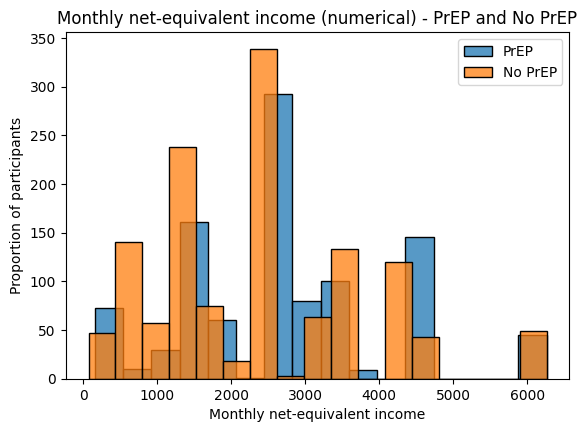

In [75]:
#    from monthly net-household-income: mean of income categories 
#    and for highest category (5,000€+) population-weighted median income (see SOEP 2018)
EINKOMMEN_mapping = {'1 bis unter 1000 €': 500, '1000 bis unter 2000 €': 1499.5, '2000 bis unter 3000 €': 2499.5, 
                     '3000 bis unter 4000 €': 3499.5, '4000 bis unter 5000 €': 4499.5, '5000 € und mehr': 6260}
PrEP['EINKOMMEN_num'] = PrEP['EINKOMMEN'].map(EINKOMMEN_mapping)
no_PrEP['EINKOMMEN_num'] = no_PrEP['EINKOMMEN'].map(EINKOMMEN_mapping)
PrEP['EINKOMMEN_num'] = PrEP['EINKOMMEN_num'].astype(float)
no_PrEP['EINKOMMEN_num'] = no_PrEP['EINKOMMEN_num'].astype(float)

#   Monthly net-equivalent incone = (monthly net-household-income) / sqrt(no. of people in household)
PrEP['Netto-Äquivalenzeinkommen'] = np.where((PrEP['EINKOMMEN_num'].isna()) | (PrEP['HAUSHALT'].isna()),
                                             np.nan,
                                             PrEP['EINKOMMEN_num'] / (np.sqrt(PrEP['HAUSHALT'])))

no_PrEP['Netto-Äquivalenzeinkommen'] = np.where((no_PrEP['EINKOMMEN_num'].isna()) | (no_PrEP['HAUSHALT'].isna()),
                                             np.nan,
                                             no_PrEP['EINKOMMEN_num'] / (np.sqrt(no_PrEP['HAUSHALT'])))

PrEP['Netto-Äquivalenzeinkommen'] = PrEP['Netto-Äquivalenzeinkommen'].astype(float)
no_PrEP['Netto-Äquivalenzeinkommen'] = no_PrEP['Netto-Äquivalenzeinkommen'].astype(float)

plt.figure(figsize =(6.5, 4.5))  # histogram of 'numerical' monthly net-equivalent income
sns.histplot(PrEP['Netto-Äquivalenzeinkommen'], label = 'PrEP')
sns.histplot(no_PrEP['Netto-Äquivalenzeinkommen'], label = 'No PrEP')
plt.title('Monthly net-equivalent income (numerical) - PrEP and No PrEP')
plt.xlabel('Monthly net-equivalent income')
plt.ylabel('Proportion of participants')
plt.legend()
plt.show()

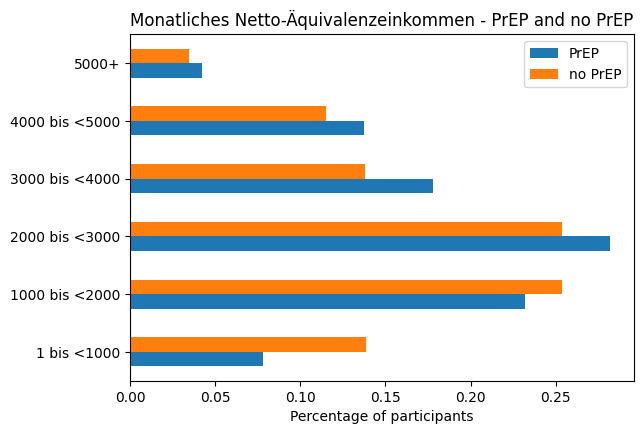

In [76]:
#    Grouping monthly net-equivalent income into categories (same as in monthly household-net-income)
no_PrEP['NET_EQUIVALENT_INCOME'] = pd.cut(no_PrEP['Netto-Äquivalenzeinkommen'], 
                                          bins=[0, 1000, 2000, 3000, 4000, 5000, 6260], 
                                          labels=['1 bis <1000', '1000 bis <2000', '2000 bis <3000', 
                                                  '3000 bis <4000', '4000 bis <5000', '5000+'])

PrEP['NET_EQUIVALENT_INCOME'] = pd.cut(PrEP['Netto-Äquivalenzeinkommen'], 
                                       bins=[0, 1000, 2000, 3000, 4000, 5000, 6260], 
                                       labels=['1 bis <1000', '1000 bis <2000', '2000 bis <3000', 
                                               '3000 bis <4000', '4000 bis <5000', '5000+'])


netto_income_order = ['1 bis <1000', '1000 bis <2000', '2000 bis <3000', '3000 bis <4000', '4000 bis <5000', '5000+']
netto_income_value_counts_PrEP = PrEP['NET_EQUIVALENT_INCOME'].value_counts(dropna=False)
netto_income_percentages_PrEP = netto_income_value_counts_PrEP / len(PrEP['NET_EQUIVALENT_INCOME'])
netto_income_value_counts_PrEP = netto_income_value_counts_PrEP.reindex(netto_income_order, fill_value=0)
netto_income_percentages_PrEP = netto_income_percentages_PrEP.reindex(netto_income_order, fill_value=0)
netto_income_value_counts_no_PrEP = no_PrEP['NET_EQUIVALENT_INCOME'].value_counts(dropna=False)
netto_income_percentages_no_PrEP = netto_income_value_counts_no_PrEP / len(no_PrEP['NET_EQUIVALENT_INCOME'])
netto_income_value_counts_no_PrEP = netto_income_value_counts_no_PrEP.reindex(netto_income_order, fill_value=0)
netto_income_percentages_no_PrEP = netto_income_percentages_no_PrEP.reindex(netto_income_order, fill_value=0)

netto_income_comparison = pd.DataFrame(
    {   'netto_income_Category': netto_income_order,
        'netto_income_Value_Count_PrEP': netto_income_value_counts_PrEP.values,
        'netto_income_Percentage_PrEP': netto_income_percentages_PrEP.values,
        'netto_income_Value_Count_no_PrEP': netto_income_value_counts_no_PrEP.values,
        'netto_income_Percentage_no_PrEP': netto_income_percentages_no_PrEP.values})

fig, ax = plt.subplots(figsize=(6.5, 4.5)) # horizontal bar plot grouped monthly net-equivalent income
bars = netto_income_comparison.plot(x = 'netto_income_Category', 
                               y = ['netto_income_Percentage_PrEP', 'netto_income_Percentage_no_PrEP'], 
                               kind = 'barh', ax = ax)
ax.set_title('Monatliches Netto-Äquivalenzeinkommen - PrEP and no PrEP')
ax.set_xlabel('Percentage of participants')
ax.set_ylabel('')
plt.legend(['PrEP', 'no PrEP'])
plt.show()

### Urban-rural-area (based on plz + federal state)
**Source:**
*Bundesinstitut für Bau-, Stadt- und Raumforschung: Laufende Raumbeobachtung des BBSR" - Datensatz: Raumgliederungssystem des Bundesinstituts für Bau-, Stadt- und Raumforschung (BBSR) zum Gebietsstand 31.12.2022 (Stand 17.11.2023) https://www.bbsr.bund.de/BBSR/DE/forschung/raumbeobachtung/Raumabgrenzungen/downloads/download-referenzen.html;jsessionid=3AD0AAC1037806DAD285D73D93290257.live11312 Veröffentlicht unter der "Datenlizenz Deutschland – Namensnennung – Version 2.0"*

provides categorisation of urban vs. rural for "Siedlungsstruktureller Kreistypen"

In [ ]:


plz_kreiskennziffer = pd.read_excel(
    '../data/spatial_data/raumgliederungen-administrativ.xlsx')

plz_kreis_city_rural = pd.read_excel(
    '../data/spatial_data/raumgliederungen-kreis.xlsx')

In [78]:
#    from BSSR: use first 3 digits of postal code of the administrative seat ("verwaltungssitz")
plz_kreiskennziffer['PLZ_3'] = pd.to_numeric(plz_kreiskennziffer['PLZ'], errors='coerce') // 100

#    based of first 3 digits of postal code (from PrApp) --> determine administrative seat ("verwaltungssitz") (from BSSR)
#    ---> based on administrative seat: determine "Kreiskennziffer" and "Kreisname" (from BSSR)
for index, row in PrEP.iterrows():
    plz = row['plz']
    state = row['BL']
    
    # for city states assign postal code of administrative seat directly based on federal state 
    if (state == 'Berlin'):     # berlin
        plz = 101 
    if (state == 'Hamburg'):    # hamburg
        plz = 200
    if (state == 'Bremen'):     # bremen
        plz = 281
    
    # places with mutliple postal codes per administrative seat (verwaltungsitz)
    if ((plz == 509) | (plz == 511) | 
        (plz == 510) | (plz == 505) |
        (plz == 508) | (plz == 507)): plz = 506         # köln
    if ((plz == 604) | (plz == 605) |
        (plz == 650) | (plz == 600) | 
        (plz == 659)): plz = 603                        # ffm
    if ((plz == 809) | (plz == 806) | 
        (plz == 804) | (plz == 807) | 
        (plz == 802) | (plz == 812) |
        (plz == 816) | (plz == 813) |
        (plz == 800) | (plz == 808) |
        (plz == 815) | (plz == 817) |
        (plz == 818) | (plz == 819) | 
        (plz == 814) | (plz == 805)): plz = 803         # muc
    if (plz == 477): plz = 478                          # krefeld
    if ((plz == 471) | (plz == 472)): plz = 470         # duisburg
    if (plz == 903): plz = 904                          # nürnberg
    if (plz == 597): plz = 598                          # arnsberg
    if (plz == 532): plz = 531                          # bonn
    if (plz == 553): plz = 551                          # mainz 
    if ((plz == 453) | (plz == 452)): plz = 451         # essen
    if ((plz == 405) | (plz == 404)): plz = 402         # düsseldorf
    if ((plz == 43) | (plz == 40) |
        (plz == 42)): plz = 41                          # leipzig
    if ((plz == 443) | (plz == 440) | 
        (plz == 442)): plz = 441                        # dortmund
    if ((plz == 421) | (plz == 423)): plz = 422         # wuppertal
    if ((plz == 705) | (plz == 704) |
        (plz == 703)): plz = 701                        # stuttgart
    if ((plz == 682) | (plz == 683)): plz = 681         # mannheim
    if ((plz == 11) | (plz == 12) |
        (plz == 13)): plz = 10                          # dresden
    if (plz == 461): plz = 460                          # oberhausen
    if (plz == 448): plz = 447                          # bochum
    if ((plz == 304) | (plz == 305) |
        (plz == 306)): plz = 301                        # hannover
    if (plz == 411): plz = 410                          # mönchengladbach

    # participant 3-digit-postal-code matches administrative seat 3-digit-postal-code
    if plz in plz_kreiskennziffer['PLZ_3'].values:
        data_row = plz_kreiskennziffer.loc[plz_kreiskennziffer['PLZ_3'] == plz]
        # from BBSR: add district code (Kreiskennziffer)
        PrEP.at[index, 'Kreisname'] = data_row['KRS_NAME'].values[0]
        PrEP.at[index, 'Kreiskennziffer'] = data_row['KRS2022'].values[0]
        PrEP.at[index, 'plz_verwaltungssitz'] = data_row['PLZ'].values[0]

# based on district code ("Kreiskennziffer") (from BSSR) --> determine urban-rural area (from BSSR)
for index, row in PrEP.iterrows():
    kreiskennziffer = row['Kreiskennziffer']
    if kreiskennziffer in plz_kreis_city_rural['KRS2022'].values:
        data_row = plz_kreis_city_rural.loc[plz_kreis_city_rural['KRS2022'] == kreiskennziffer]
        PrEP.at[index, 'URBAN_RURAL_AREA'] = data_row['KSU_NAME'].values[0]
        PrEP.at[index, 'SETTLEMENT_TYPE'] = data_row['KTU_NAME'].values[0]
        
# check for unmatched postal codes and if needed add manually 
PrEP_nan_kreisname = PrEP[PrEP['Kreisname'].apply(lambda x: pd.isna(x) or x == 'nan')]
PrEP_nan_kreisname['plz'].value_counts(dropna = False) # 25 PrEP participants w/o plz

plz
NaN    25
Name: count, dtype: int64

In [79]:
for index, row in no_PrEP.iterrows():
    plz = row['plz']
    state = row['BL']
    if (state == 'Berlin'):     # berlin
        plz = 101 
    if (state == 'Hamburg'):    # hamburg
        plz = 200
    if (state == 'Bremen'):     # hamburg
        plz = 281
    if ((plz == 509) | (plz == 511) | 
        (plz == 510) |
        (plz == 508) | (plz == 507)): plz = 506     # köln
    if ((plz == 604) | (plz == 605) |
        (plz == 650) | (plz == 600) |
        (plz == 659)): plz = 603                    # ffm
    if ((plz == 809) | (plz == 806) | 
        (plz == 804) | (plz == 807) | 
        (plz == 802) | (plz == 812) |
        (plz == 816) | (plz == 813) |
        (plz == 800) | (plz == 808) |
        (plz == 815) | (plz == 817) |
        (plz == 818) | (plz == 819)): plz = 803     # muc 
    if (plz == 477): plz = 478                      # krefeld
    if (plz == 471): plz = 470                      # duisburg
    if (plz == 903): plz = 904                      # nürnberg
    if (plz == 597): plz = 598                      # arnsberg
    if (plz == 532): plz = 531                      # bonn
    if (plz == 553): plz = 551   # (?)              # mainz 
    if ((plz == 453) | (plz == 452)): plz = 451     # essen
    if ((plz == 405) | (plz == 404)): plz = 402     # düsseldorf
    if ((plz == 43) | (plz == 40)): plz = 41        # leipzig
    if ((plz == 443) | (plz == 440) |  # 440 (?)
        (plz == 442)): plz = 441                    # dortmund
    if ((plz == 421) | (plz == 423)): plz = 422     # wuppertal
    if ((plz == 705) | (plz == 704) |
        (plz == 703)): plz = 701                    # stuttgart
    if ((plz == 682) | (plz == 683)): plz = 681     # mannheim
    if (plz == 11): plz = 10                        # dresden
    if (plz == 461): plz = 460                      # oberhausen
    if (plz == 448): plz = 447                      # bochum
    if ((plz == 304) | (plz == 305)): plz = 301     # hannover
    if (plz == 411): plz = 410                      # mönchengladbach

    if plz in plz_kreiskennziffer['PLZ_3'].values:
        data_row = plz_kreiskennziffer.loc[plz_kreiskennziffer['PLZ_3'] == plz]
        no_PrEP.at[index, 'Kreisname'] = data_row['KRS_NAME'].values[0]
        no_PrEP.at[index, 'Kreiskennziffer'] = data_row['KRS2022'].values[0]
        no_PrEP.at[index, 'plz_verwaltungssitz'] = data_row['PLZ'].values[0]

for index, row in no_PrEP.iterrows():
    kreiskennziffer = row['Kreiskennziffer']
    if kreiskennziffer in plz_kreis_city_rural['KRS2022'].values:
        data_row = plz_kreis_city_rural.loc[plz_kreis_city_rural['KRS2022'] == kreiskennziffer]
        no_PrEP.at[index, 'URBAN_RURAL_AREA'] = data_row['KSU_NAME'].values[0]
        no_PrEP.at[index, 'SETTLEMENT_TYPE'] = data_row['KTU_NAME'].values[0]
        
no_PrEP_nan_kreisname = no_PrEP[no_PrEP['Kreisname'].apply(lambda x: pd.isna(x) or x == 'nan')]
no_PrEP_nan_kreisname['plz'].value_counts(dropna = False) # 55 no PrEP participants w/o plz 

plz
NaN    55
Name: count, dtype: int64

### HIV-specialists-density (based federal state)
HIV-specialists-density (Number of HIV-specialists/10.000 gay men) 

Source HIV-specialists-Density (Number of HIV-specialists/10.000 gay men): provided by Ulrich Marcus (June 2020) (dagnä website)


In [80]:
for index, row in no_PrEP.iterrows():
    state = row['BL']
    if (state == 'Schleswig-Holstein'):
        no_PrEP.at[index, 'HIV_SPECIALIST_DENSITY'] = '0'
    if ((state == 'Brandenburg') | (state == 'Mecklenburg-Vorpommern') |
        (state == 'Rheinland-Pfalz') | (state == 'Sachsen-Anhalt') |
        (state == 'Thüringen')): no_PrEP.at[index, 'HIV_SPECIALIST_DENSITY'] = '1-2'
    if ((state == 'Bayern') | (state == 'Saarland') |
        (state == 'Niedersachsen') | 
        (state == 'Sachsen')): no_PrEP.at[index, 'HIV_SPECIALIST_DENSITY'] = '3-5'
    if ((state == 'Nordrhein-Westfalen') | (state == 'Baden-Württemberg') |
        (state == 'Hessen')): no_PrEP.at[index, 'HIV_SPECIALIST_DENSITY'] = '6-9'
    if ((state == 'Berlin') | (state == 'Bremen') |
        (state == 'Hamburg')):  no_PrEP.at[index, 'HIV_SPECIALIST_DENSITY'] = '10-13'

for index, row in PrEP.iterrows():
    state = row['BL']
    if (state == 'Schleswig-Holstein'):
        PrEP.at[index, 'HIV_SPECIALIST_DENSITY'] = '0'
    if ((state == 'Brandenburg') | (state == 'Mecklenburg-Vorpommern') |
        (state == 'Rheinland-Pfalz') | (state == 'Sachsen-Anhalt') |
        (state == 'Thüringen')): PrEP.at[index, 'HIV_SPECIALIST_DENSITY'] = '1-2'
    if ((state == 'Bayern') | (state == 'Saarland') |
        (state == 'Niedersachsen') | 
        (state == 'Sachsen')): PrEP.at[index, 'HIV_SPECIALIST_DENSITY'] = '3-5'
    if ((state == 'Nordrhein-Westfalen') | (state == 'Baden-Württemberg') |
        (state == 'Hessen')): PrEP.at[index, 'HIV_SPECIALIST_DENSITY'] = '6-9'
    if ((state == 'Berlin') | (state == 'Bremen') |
        (state == 'Hamburg')):  PrEP.at[index, 'HIV_SPECIALIST_DENSITY'] = '10-13'

In [ ]:
# filtered version of PrEP and non-PrEP users 

PrEP_filtered = PrEP[['ABSCHLUSS_TYPE', 'SEXLIFE', 'alter', 'ALL_SEXWITH_MEN',
       'ALL_SEXWITH_WOMEN', 'ALL_SEXWITH_NONBINARY', 'ALL_SEXPARTNER',
       'ALL_SEXFREQ', 'ALL_DRUGS', 'ALL_DRUGS_INJECT', 'ALL_SEXWORK',
       'ALL_KONDOM', 'ALL_STI_SYMPTOM', 'ALL_TESTSTIPOS_SYPH_w3',
       'ALL_TESTSTIPOS_GO_w3', 'ALL_TESTSTIPOS_CHLA_w3',
       'ALL_TESTSTIPOS_HCV_w3', 'ALL_TESTSTIPOS_KEINE_w3', 'ALL_TESTSYPH_FREQ',
       'ALL_TESTGO_FREQ', 'ALL_TESTCHLA_FREQ', 'ALL_TESTHCV_FREQ', 'landbin',
       'NET_EQUIVALENT_INCOME', 'URBAN_RURAL_AREA', 'HIV_SPECIALIST_DENSITY', 'status', 'welle']].copy()

no_PrEP_filtered = no_PrEP[['ABSCHLUSS_TYPE', 'SEXLIFE', 'alter', 'ALL_SEXWITH_MEN',
       'ALL_SEXWITH_WOMEN', 'ALL_SEXWITH_NONBINARY', 'ALL_SEXPARTNER',
       'ALL_SEXFREQ', 'ALL_DRUGS', 'ALL_DRUGS_INJECT', 'ALL_SEXWORK',
       'ALL_KONDOM', 'ALL_STI_SYMPTOM', 'ALL_TESTSTIPOS_SYPH_w3',
       'ALL_TESTSTIPOS_GO_w3', 'ALL_TESTSTIPOS_CHLA_w3',
       'ALL_TESTSTIPOS_HCV_w3', 'ALL_TESTSTIPOS_KEINE_w3', 'ALL_TESTSYPH_FREQ',
       'ALL_TESTGO_FREQ', 'ALL_TESTCHLA_FREQ', 'ALL_TESTHCV_FREQ', 'landbin',
       'NET_EQUIVALENT_INCOME', 'URBAN_RURAL_AREA', 'HIV_SPECIALIST_DENSITY', 'status',
       'NO_PREPGRUND_C1_w3','NO_PREPGRUND_C4_w3', 'NO_PREPGRUND_C6_w3', 'NO_PREPGRUND_C5_w3', 'NO_PREPGRUND_C8_w3',
       'NO_PREPGRUND_C9_w3', 'NO_PREPGRUND_C7_w3', 'NO_PREPGRUND_C3_w3', 'welle']].copy()

PrEP_filtered.to_csv('PrEP_filtered.csv') 
no_PrEP_filtered.to_csv('no_PrEP_filtered.csv') 

## Preprocessing of all participant data for sensitivity analysis

In [ ]:
all_participants = pd.read_stata('../data/survey_data/PrApp_Welle3u4.dta')  

# cleaning all participants data 
#     remove not relevant categories (either "I don't know" or "Not specified")
columns_to_clean = ['ALL_SEXPARTNER', 'ALL_SEXFREQ', 'ALL_KONDOM', 'FORMER', 'ALL_TESTHIV', 'ALL_TESTSTI']
for column in columns_to_clean:
    if 'Weiß nicht' in all_participants[column].cat.categories:
        all_participants.loc[:, column] = all_participants[column].cat.remove_categories('Weiß nicht')
    else: print(column)
columns_to_clean_2 = ['ABSCHLUSS', 'ALL_DRUGS', 'ALL_SEXWORK', 'ALL_STI_SYMPTOM']
for column_2 in columns_to_clean_2:
    if 'Kein Angabe' in all_participants[column_2].cat.categories:
        all_participants.loc[:, column_2] = all_participants[column_2].cat.remove_categories('Kein Angabe')
    else: print(column_2)
    
all_participants.loc[:, 'ALL_DRUGS_INJECT'] = all_participants['ALL_DRUGS_INJECT'].cat.remove_categories('Keine Angabe')
all_participants.loc[:, 'SEXLIFE'] = all_participants['SEXLIFE'].cat.remove_categories('Ich bin mir nicht sicher')
all_participants.rename(columns = {'ALL_SEXMIT_C1_w3': 'ALL_SEXWITH_MEN', 'ALL_SEXMIT_C2_w3':'ALL_SEXWITH_WOMEN', 
                       'ALL_SEXMIT_C3_w3': 'ALL_SEXWITH_NONBINARY'}, inplace = True)

new_category_names = {
    'ALL_SEXFREQ': {
        'gar nicht': '0x'},
    'ALL_KONDOM': {
        'Manchmal ca25%': '25%',
        'Nie': '0%',
        'Ca 50%': '50%',
        'Oft ca75%': '75%',
        'Immer >95%': '>95%'},
    'SEXLIFE': {
        'Zufrieden': 'Content',
        'Sehr zufrieden': 'Very content',
        'Ich bin mir nicht sicher': 'Not sure',
        'Unzufrieden': 'Discontent',
        'Sex gerade keine Rolle': 'Sex doesnt matter right now',
        'Sehr unzufrieden': 'Very discontent'}}
for column, replacements in new_category_names.items():
    all_participants[column].replace(replacements, inplace=True)
    
# grouping 
all_participants['SEXLIFE'] = all_participants['SEXLIFE'].replace({'Very discontent': 'Discontent', 'Very content': 'Content'})

# add 'Kein Abschluss' to 'ABSCHLUSS_TYPE'
all_participants['ABSCHLUSS_TYPE'] = all_participants['ABSCHLUSS_TYPE'].cat.add_categories('Kein Abschluss')
all_participants.loc[all_participants['ABSCHLUSS'] == 'Nein', 'ABSCHLUSS_TYPE'] = 'Kein Abschluss'

STI_frequency_bins = [-100, 0, 1, 100]  
STI_frequency_labels = ['0', '1', '2+']
all_participants['ALL_TESTSYPH_FREQ'] = pd.cut(all_participants['ALL_TESTSYPH_FREQ'], bins = STI_frequency_bins, labels = STI_frequency_labels, include_lowest = True)
all_participants['ALL_TESTGO_FREQ'] = pd.cut(all_participants['ALL_TESTGO_FREQ'], bins = STI_frequency_bins, labels = STI_frequency_labels, include_lowest = True)
all_participants['ALL_TESTCHLA_FREQ'] = pd.cut(all_participants['ALL_TESTCHLA_FREQ'], bins = STI_frequency_bins, labels = STI_frequency_labels, include_lowest = True)

EINKOMMEN_mapping= {'1 bis unter 1000 €': 500, '1000 bis unter 2000 €': 1499.5, '2000 bis unter 3000 €': 2499.5, 
                     '3000 bis unter 4000 €': 3499.5, '4000 bis unter 5000 €': 4499.5, '5000 € und mehr': 6260}
all_participants['EINKOMMEN_num'] = all_participants['EINKOMMEN'].map(EINKOMMEN_mapping)
all_participants['EINKOMMEN_num'] = all_participants['EINKOMMEN_num'].astype(float)

#   Monthly net-equivalent incone = (monthly net-household-income) / sqrt(no. of people in household)
all_participants['Netto-Äquivalenzeinkommen'] = np.where((all_participants['EINKOMMEN_num'].isna()) | (all_participants['HAUSHALT'].isna()),
                                             np.nan,
                                             all_participants['EINKOMMEN_num'] / (np.sqrt(all_participants['HAUSHALT'])))

all_participants['Netto-Äquivalenzeinkommen'] = all_participants['Netto-Äquivalenzeinkommen'].astype(float)

all_participants['NET_EQUIVALENT_INCOME'] = pd.cut(all_participants['Netto-Äquivalenzeinkommen'], 
                                       bins=[0, 1000, 2000, 3000, 4000, 5000, 6260], 
                                       labels=['1 bis <1000', '1000 bis <2000', '2000 bis <3000', 
                                               '3000 bis <4000', '4000 bis <5000', '5000+'])

# Source:
# Bundesinstitut für Bau-, Stadt- und Raumforschung: Laufende Raumbeobachtung des BBSR" - 
# Datensatz: Raumgliederungssystem des Bundesinstituts für Bau-, Stadt- und Raumforschung (BBSR) zum Gebietsstand 31.12.2022 (Stand 17.11.2023) 
# https://www.bbsr.bund.de/BBSR/DE/forschung/raumbeobachtung/Raumabgrenzungen/downloads/download-referenzen.html;jsessionid=3AD0AAC1037806DAD285D73D93290257.live11312 
# Veröffentlicht unter der "Datenlizenz Deutschland – Namensnennung – Version 2.0"

plz_kreiskennziffer = pd.read_excel(
    '../data/spatial_data/raumgliederungen-administrativ.xlsx')

plz_kreis_city_rural = pd.read_excel(
    '../data/spatial_data/raumgliederungen-kreis.xlsx')


#    from BSSR: use first 3 digits of postal code of the administrative seat ("verwaltungssitz")
plz_kreiskennziffer['PLZ_3'] = pd.to_numeric(plz_kreiskennziffer['PLZ'], errors='coerce') // 100

for index, row in all_participants.iterrows():
    plz = row['plz']
    state = row['BL']
    
    # for city states assign postal code of administrative seat directly based on federal state 
    if (state == 'Berlin'):     # berlin
        plz = 101 
    if (state == 'Hamburg'):    # hamburg
        plz = 200
    if (state == 'Bremen'):     # bremen
        plz = 281
    
    # places with mutliple postal codes per administrative seat (verwaltungsitz)
    if ((plz == 509) | (plz == 511) | 
        (plz == 510) | (plz == 505) |
        (plz == 508) | (plz == 507)): plz = 506         # köln
    if ((plz == 604) | (plz == 605) |
        (plz == 650) | (plz == 600) | 
        (plz == 659)): plz = 603                        # ffm
    if ((plz == 809) | (plz == 806) | 
        (plz == 804) | (plz == 807) | 
        (plz == 802) | (plz == 812) |
        (plz == 816) | (plz == 813) |
        (plz == 800) | (plz == 808) |
        (plz == 815) | (plz == 817) |
        (plz == 818) | (plz == 819) | 
        (plz == 814) | (plz == 805)): plz = 803         # muc
    if (plz == 477): plz = 478                          # krefeld
    if ((plz == 471) | (plz == 472)): plz = 470         # duisburg
    if ((plz == 903)| (plz == 901)): plz = 904                             # nürnberg
    if (plz == 597): plz = 598                          # arnsberg
    if (plz == 532): plz = 531                          # bonn
    if (plz == 553): plz = 551                          # mainz 
    if ((plz == 453) | (plz == 452)): plz = 451         # essen
    if ((plz == 405) | (plz == 404)): plz = 402         # düsseldorf
    if ((plz == 43) | (plz == 40) |
        (plz == 42)): plz = 41                          # leipzig
    if ((plz == 443) | (plz == 440) | 
        (plz == 442)): plz = 441                        # dortmund
    if ((plz == 421) | (plz == 423)): plz = 422         # wuppertal
    if ((plz == 705) | (plz == 704) |
        (plz == 703)): plz = 701                        # stuttgart
    if ((plz == 682) | (plz == 683)): plz = 681         # mannheim
    if ((plz == 11) | (plz == 12) |
        (plz == 13)): plz = 10                          # dresden
    if (plz == 461): plz = 460                          # oberhausen
    if (plz == 448): plz = 447                          # bochum
    if ((plz == 304) | (plz == 305) |
        (plz == 306)): plz = 301                        # hannover
    if (plz == 411): plz = 410                          # mönchengladbach

    # participant 3-digit-postal-code matches administrative seat 3-digit-postal-code
    if plz in plz_kreiskennziffer['PLZ_3'].values:
        data_row = plz_kreiskennziffer.loc[plz_kreiskennziffer['PLZ_3'] == plz]
        # from BBSR: add district code (Kreiskennziffer)
        all_participants.at[index, 'Kreisname'] = data_row['KRS_NAME'].values[0]
        all_participants.at[index, 'Kreiskennziffer'] = data_row['KRS2022'].values[0]
        all_participants.at[index, 'plz_verwaltungssitz'] = data_row['PLZ'].values[0]

# based on district code ("Kreiskennziffer") (from BSSR) --> determine urban-rural area (from BSSR)
for index, row in all_participants.iterrows():
    kreiskennziffer = row['Kreiskennziffer']
    if kreiskennziffer in plz_kreis_city_rural['KRS2022'].values:
        data_row = plz_kreis_city_rural.loc[plz_kreis_city_rural['KRS2022'] == kreiskennziffer]
        all_participants.at[index, 'URBAN_RURAL_AREA'] = data_row['KSU_NAME'].values[0]
        all_participants.at[index, 'SETTLEMENT_TYPE'] = data_row['KTU_NAME'].values[0]
        
# check for unmatched postal codes and if needed add manually 
all_participants_nan_kreisname = all_participants[all_participants['Kreisname'].apply(lambda x: pd.isna(x) or x == 'nan')]
all_participants_nan_kreisname['plz'].value_counts(dropna = False) 


for index, row in all_participants.iterrows():
    state = row['BL']
    if (state == 'Schleswig-Holstein'):
        all_participants.at[index, 'HIV_SPECIALIST_DENSITY'] = '0'
    if ((state == 'Brandenburg') | (state == 'Mecklenburg-Vorpommern') |
        (state == 'Rheinland-Pfalz') | (state == 'Sachsen-Anhalt') |
        (state == 'Thüringen')): all_participants.at[index, 'HIV_SPECIALIST_DENSITY'] = '1-2'
    if ((state == 'Bayern') | (state == 'Saarland') |
        (state == 'Niedersachsen') | 
        (state == 'Sachsen')): all_participants.at[index, 'HIV_SPECIALIST_DENSITY'] = '3-5'
    if ((state == 'Nordrhein-Westfalen') | (state == 'Baden-Württemberg') |
        (state == 'Hessen')): all_participants.at[index, 'HIV_SPECIALIST_DENSITY'] = '6-9'
    if ((state == 'Berlin') | (state == 'Bremen') |
        (state == 'Hamburg')):  all_participants.at[index, 'HIV_SPECIALIST_DENSITY'] = '10-13'

In [ ]:
#    filtered version of all participants
all_participants_filtered = all_participants[['ABSCHLUSS_TYPE', 'SEXLIFE', 'alter', 'ALL_SEXWITH_MEN',
                                              'ALL_SEXWITH_WOMEN', 'ALL_SEXWITH_NONBINARY', 'ALL_SEXPARTNER',
                                              'ALL_SEXFREQ', 'ALL_DRUGS', 'ALL_DRUGS_INJECT', 'ALL_SEXWORK',
                                              'ALL_KONDOM', 'ALL_STI_SYMPTOM', 'ALL_TESTSTIPOS_SYPH_w3',
                                              'ALL_TESTSTIPOS_GO_w3', 'ALL_TESTSTIPOS_CHLA_w3',
                                              'ALL_TESTSTIPOS_HCV_w3', 'ALL_TESTSTIPOS_KEINE_w3', 'ALL_TESTSYPH_FREQ',
                                              'ALL_TESTGO_FREQ', 'ALL_TESTCHLA_FREQ', 'ALL_TESTHCV_FREQ', 'landbin',
                                              'NET_EQUIVALENT_INCOME', 'URBAN_RURAL_AREA',
                                              'HIV_SPECIALIST_DENSITY', 'AGE', 'status', 'gendersex']].copy()
all_participants_filtered.to_csv('all_participants_filtered.csv', index = True)